In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Common imports
import numpy as np
import os

### Loading the train, test, validation data:

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
valid_data = pd.read_csv('validation.csv')

### Postprocessing data for transforming message to vector

In [5]:
spam_words = {}
ham_words = {}
s_c = 0
h_c = 0
i = 0
for line in list(train_data.message):
    if list(train_data.label)[i] == "spam":
        s_c += 1
        s_w = line.split(" ")
        for word in s_w:
            if word.lower() in spam_words.keys():
                spam_words[word.lower()] += 1
            else:
                spam_words[word.lower()] = 1
    else:
        h_c += 1
        h_w = line.split(" ")
        for word in h_w:
            if word.lower() in ham_words.keys():
                ham_words[word.lower()] += 1
            else:
                ham_words[word.lower()] = 1
    i += 1

In [6]:
print(len(spam_words.keys()))

3107


In [7]:
print(h_c,s_c)

3502 524


In [8]:
ham_words["week"]

30

In [9]:
spam_words_sorted = sorted(spam_words.items(), key=lambda x:x[1])
spam_words_sorted[0][0]

'2/2'

In [12]:
top_300_spam_words = list(spam_words_sorted[i][0] for i in range(-300,0))
print(top_300_spam_words)

['secret', 'thinks', 'shop', 'weeks', 'summer', '2003', '800', 'discount', 'cs', 'collection', 'sunshine', 'txting', 'txts', 'rates', 'wanna', 'good', 'b', 'custcare', 'within', 'hi', '10p', 'day', 'representative', 'digital', 'sms.', 'may', 'n', 'why', 'date', '!', 'pic', 'ltd,', '0800', 'was', 'my', 'cd', 'name', 'charity', 'â£200', 'flag', 'mobile!', 'rental', 'phones', 'eg', 'urgent', 'â£800', 'private!', 'statement', 'points.', 'identifier', 'code:', 'offers', 'complimentary', 'quiz', 'national', 'then', 'wk', 'each', "don't", 'yes', 'x', 'congratulations', 'end', 'important', 'no.', 'unlimited', 'charged', 'camcorder', 'mobiles', 'love', 'they', 'what', 'either', 'ntt', 'when', 'ts&cs', 'last', 'expires', 'code', 't', 'rate', 'texts', 'dont', 'like', 'anytime', 'thanks', 'sexy', 'operator', '87066', 'now.', 'stop.', 'free.', '100', 'worth', 'voucher', 'next', '18+', 'week!', 'hot', 'gift', 'tried', 'services', 'sms', 'attempt', '08000930705', 'txt:', '+', 'pobox', 'cost', 'poly',

In [13]:
ham_words_sorted = sorted(ham_words.items(), key=lambda x:x[1])
ham_words_sorted[0][0]

"'rencontre'"

In [14]:
top_200_ham_words = list(ham_words_sorted[i][0] for i in range(-200,0))
print(top_200_ham_words)

['thk', 'leave', 'which', 'thing', 'many', 'down', 'other', '!', 'sure', 'went', "that's", 'free', 'wait', 'b', 'anything', 'even', 'it.', 'us', 'wan', 'sorry,', 'c', 'dear', 'dun', 'tomorrow', 'sent', 'lor...', 'gud', 'lol', 'buy', 'cant', 'around', 'let', 'yeah', 'our', 'were', 'told', 'last', 'very', "i've", 'ãœ', 'work', ':)', 'why', 'who', 'gonna', 'phone', 'today', 'keep', 'wat', 'feel', 'right', 'also', 'text', 'them', 'new', 'his', 'great', 'doing', 'oh', 'im', 'happy', 'you.', 'more', 'please', 'too', 'here', 'pick', 'now.', 'hi', 'really', 'meet', 'miss', 'said', 'lor.', 'night', 'well', 'would', 'e', 'should', 'pls', 'da', 'after', 'cos', 'hey', 'much', 'sorry', 'way', "it's", 'ask', 'me.', 'been', 'had', 'an', 'has', 'make', '&amp;', 'where', 'give', 'say', 'd', 'her', 'hope', 'him', 'any', 'back', 'ã¼', 'later', 'take', 'home', 'only', 'day', 'they', 'some', 'tell', 'there', 'think', 'she', 'send', 'did', 'dont', 'need', 'see', 'r', 'as', '...', 'from', 'n', 'by', "don't",

In [15]:
true_spam_words = []
for i in top_300_spam_words:
    if i in ham_words.keys():
        if ham_words[i] <= h_c/100: #i.e., these spam words appeared very fewer times in ham messages.
            true_spam_words.append(i)
    else:
        true_spam_words.append(i)
print(true_spam_words,len(true_spam_words))

['secret', 'thinks', 'shop', 'weeks', 'summer', '2003', '800', 'discount', 'cs', 'collection', 'sunshine', 'txting', 'txts', 'rates', 'wanna', 'custcare', 'within', '10p', 'representative', 'digital', 'sms.', 'may', 'date', 'pic', 'ltd,', '0800', 'cd', 'name', 'charity', 'â£200', 'flag', 'mobile!', 'rental', 'phones', 'eg', 'urgent', 'â£800', 'private!', 'statement', 'points.', 'identifier', 'code:', 'offers', 'complimentary', 'quiz', 'national', 'wk', 'each', 'yes', 'x', 'congratulations', 'end', 'important', 'no.', 'unlimited', 'charged', 'camcorder', 'mobiles', 'either', 'ntt', 'ts&cs', 'expires', 'code', 't', 'rate', 'texts', 'anytime', 'thanks', 'sexy', 'operator', '87066', 'stop.', 'free.', '100', 'worth', 'voucher', 'next', '18+', 'week!', 'hot', 'gift', 'tried', 'services', 'sms', 'attempt', '08000930705', 'txt:', '+', 'pobox', 'cost', 'poly', 'dating', 'half', 'price', 'collection.', 'sae', 'â£100', 'apply.', 'account', 'player', 'double', '08000839402', 'xmas', 'â£250', 'appl

So, 91 words were some common words in English which appear frequently in any kind of messages.

In [16]:
spam_dict = {spam_w: true_spam_words.index(spam_w) for spam_w in true_spam_words}
print(spam_dict)

{'secret': 0, 'thinks': 1, 'shop': 2, 'weeks': 3, 'summer': 4, '2003': 5, '800': 6, 'discount': 7, 'cs': 8, 'collection': 9, 'sunshine': 10, 'txting': 11, 'txts': 12, 'rates': 13, 'wanna': 14, 'custcare': 15, 'within': 16, '10p': 17, 'representative': 18, 'digital': 19, 'sms.': 20, 'may': 21, 'date': 22, 'pic': 23, 'ltd,': 24, '0800': 25, 'cd': 26, 'name': 27, 'charity': 28, 'â£200': 29, 'flag': 30, 'mobile!': 31, 'rental': 32, 'phones': 33, 'eg': 34, 'urgent': 35, 'â£800': 36, 'private!': 37, 'statement': 38, 'points.': 39, 'identifier': 40, 'code:': 41, 'offers': 42, 'complimentary': 43, 'quiz': 44, 'national': 45, 'wk': 46, 'each': 47, 'yes': 48, 'x': 49, 'congratulations': 50, 'end': 51, 'important': 52, 'no.': 53, 'unlimited': 54, 'charged': 55, 'camcorder': 56, 'mobiles': 57, 'either': 58, 'ntt': 59, 'ts&cs': 60, 'expires': 61, 'code': 62, 't': 63, 'rate': 64, 'texts': 65, 'anytime': 66, 'thanks': 67, 'sexy': 68, 'operator': 69, '87066': 70, 'stop.': 71, 'free.': 72, '100': 73, '

### Message to vector transformation:

Defining function to convert every messages to some vectors to make our training dataset to be fitted to ML models

In [21]:
def messtovec(message):
    data = [0 for i in range(210)] #for 209 spam words, length of message
    content = message.split(" ")
    for i in content:
        if i.lower() in spam_dict.keys():
            data[spam_dict[i.lower()]] = 1
    data[-1] = len(content)
    return data

In [28]:
def data_prep(data):
    column_names = [i for i in true_spam_words] + ["length"]
    Full_data = []
    i = 0
    index_names = []
    for line in list(data.message):
        i += 1
        index_names.append(i)
        d = messtovec(line)
        Full_data.append(d)
    return Full_data,index_names,column_names

tr_d,tr_i,tr_c = data_prep(train_data)
train_X = pd.DataFrame(data = tr_d, 
                  index = tr_i, 
                  columns = tr_c)

va_d,va_i,va_c = data_prep(valid_data)
valid_X = pd.DataFrame(data = va_d, 
                  index = va_i, 
                  columns = va_c)

te_d,te_i,te_c = data_prep(test_data)
test_X = pd.DataFrame(data = te_d, 
                  index = te_i, 
                  columns = te_c)

In [43]:
train_Y = pd.DataFrame(data = list(train_data.label), 
                  index = [i+1 for i in range(len(list(train_data.label)))],
                  columns = ["label"])

test_Y = pd.DataFrame(data = list(test_data.label), 
                  index = [i+1 for i in range(len(list(test_data.label)))],
                  columns = ["label"])

valid_Y = pd.DataFrame(data = list(valid_data.label), 
                  index = [i+1 for i in range(len(list(valid_data.label)))],
                  columns = ["label"])

In [45]:
train_Y['label'] = train_Y['label'].replace(['spam'], 1)
train_Y['label'] = train_Y['label'].replace(['ham'], 0)

test_Y['label'] = test_Y['label'].replace(['spam'], 1)
test_Y['label'] = test_Y['label'].replace(['ham'], 0)

valid_Y['label'] = valid_Y['label'].replace(['spam'], 1)
valid_Y['label'] = valid_Y['label'].replace(['ham'], 0)

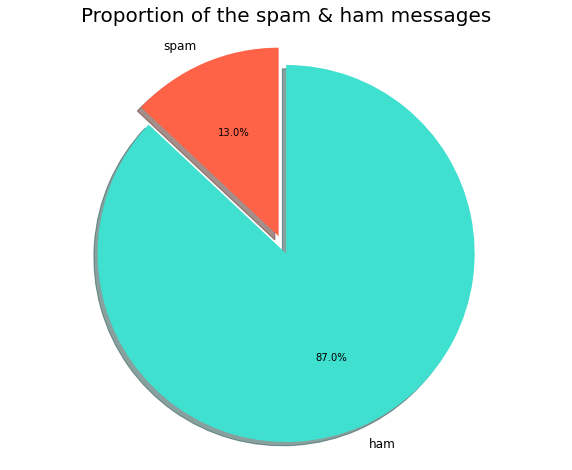

In [46]:
#Pie-Chart of output variable
labels = 'spam', 'ham'
sizes = [train_Y.label[train_Y['label']==1].count(), train_Y.label[train_Y['label']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors =["tomato","turquoise"] )
ax1.axis('equal')
plt.title("Proportion of the spam & ham messages", size = 20)
plt.show()

So, this is a very unbalanced dataset

# Random Forest Classifier:

In [65]:
from sklearn.ensemble import RandomForestClassifier
#for computing Mean Absolute Error
from sklearn.metrics import mean_absolute_error
def score_dataset(X_train, X_valid, y_train, y_valid,i,n):
    model = RandomForestClassifier(n_estimators = n, max_depth = i, random_state = 42, class_weight = {0:13,1:87})
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [66]:
MAE = 1
for i in range(1,30):
    print("MAE:",score_dataset(train_X, valid_X, np.ravel(train_Y), np.ravel(valid_Y),i,100),"max_depth =",i)
    temp = score_dataset(train_X, valid_X, np.ravel(train_Y), np.ravel(valid_Y),i,100) 
    if MAE > temp:
        MAE = temp
        max_depth = i

MAE: 0.06751054852320675 max_depth = 1
MAE: 0.07313642756680731 max_depth = 2
MAE: 0.06469760900140648 max_depth = 3
MAE: 0.06891701828410689 max_depth = 4
MAE: 0.06469760900140648 max_depth = 5
MAE: 0.06188466947960619 max_depth = 6
MAE: 0.06329113924050633 max_depth = 7
MAE: 0.05907172995780591 max_depth = 8
MAE: 0.06047819971870605 max_depth = 9
MAE: 0.05485232067510549 max_depth = 10
MAE: 0.052039381153305204 max_depth = 11
MAE: 0.05485232067510549 max_depth = 12
MAE: 0.05485232067510549 max_depth = 13
MAE: 0.052039381153305204 max_depth = 14
MAE: 0.053445850914205346 max_depth = 15
MAE: 0.04922644163150492 max_depth = 16
MAE: 0.04781997187060478 max_depth = 17
MAE: 0.046413502109704644 max_depth = 18
MAE: 0.04922644163150492 max_depth = 19
MAE: 0.04781997187060478 max_depth = 20
MAE: 0.04922644163150492 max_depth = 21
MAE: 0.046413502109704644 max_depth = 22
MAE: 0.040787623066104076 max_depth = 23
MAE: 0.040787623066104076 max_depth = 24
MAE: 0.04219409282700422 max_depth = 25
MA

In [67]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = max_depth, class_weight = {0:13,1:87})
rf.fit(train_X,np.ravel(train_Y))

RandomForestClassifier(class_weight={0: 13, 1: 87}, max_depth=29,
                       random_state=42)

In [68]:
#memory used in fitting the Train data to the model
%load_ext memory_profiler
from memory_profiler import profile

%memit rf.fit(train_X,np.ravel(train_Y))

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 183.28 MiB, increment: 1.46 MiB


In [69]:
pred_Y = rf.predict(test_X)

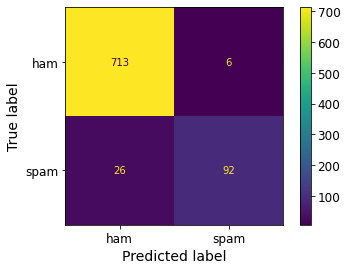

In [70]:
#confusion matrix for Decision Tree

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

f = open("random_forest.txt", "w")

accuracy_score = metrics.accuracy_score(test_Y, pred_Y)

con_matrix = confusion_matrix(test_Y,pred_Y, labels=[0,1])

report_matrix = classification_report(test_Y, pred_Y,labels=[0,1])

L = [str(accuracy_score),"\n\n",str(con_matrix),'\n\n', str(report_matrix)] 
f.writelines(L) 
f.close()

from sklearn.metrics import ConfusionMatrixDisplay
fig = plt.figure()
Disp =ConfusionMatrixDisplay(con_matrix,display_labels=['ham','spam'])
Disp.plot()
plt.savefig("random_forest_confusion_matrix")
plt.close(fig)

In [71]:
print(report_matrix)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       719
           1       0.94      0.78      0.85       118

    accuracy                           0.96       837
   macro avg       0.95      0.89      0.91       837
weighted avg       0.96      0.96      0.96       837



# Naive Bayes Classifier:

In [94]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.metrics import mean_absolute_error
def score_dataset(X_train, X_valid, y_train, y_valid, nb):
    model = nb
    model.fit(X_train, np.ravel(y_train))
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [95]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
# instantiate the model
gnb = GaussianNB()
conb = ComplementNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
canb = CategoricalNB()
nb = [gnb, conb, mnb, bnb, canb]

MAE = 1
for i in nb:
    print("MAE:",score_dataset(train_X, valid_X, np.ravel(train_Y), np.ravel(valid_Y), i),"naive bayes' model =",i)
    temp = score_dataset(train_X, valid_X, np.ravel(train_Y), np.ravel(valid_Y), i) 
    if MAE > temp:
        MAE = temp
        nb_model = i

MAE: 0.05485232067510549 naive bayes' model = GaussianNB()
MAE: 0.053445850914205346 naive bayes' model = ComplementNB()
MAE: 0.04922644163150492 naive bayes' model = MultinomialNB()
MAE: 0.04360056258790436 naive bayes' model = BernoulliNB()
MAE: 0.04219409282700422 naive bayes' model = CategoricalNB()


In [96]:
# fit the model
nb_model.fit(train_X, np.ravel(train_Y))

CategoricalNB()

In [97]:
#memory used in fitting the Train data to the model
%load_ext memory_profiler
from memory_profiler import profile
%memit gnb.fit(train_X,np.ravel(train_Y))

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 179.47 MiB, increment: 11.30 MiB


In [98]:
pred_Y = gnb.predict(test_X)

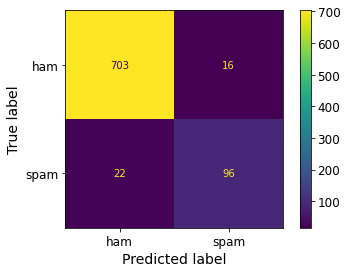

In [99]:
#confusion matrix for Decision Tree

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

f = open("Bayes'_tree.txt", "w")

accuracy_score = metrics.accuracy_score(test_Y, pred_Y)

con_matrix = confusion_matrix(test_Y,pred_Y, labels=[0,1])

report_matrix = classification_report(test_Y, pred_Y,labels=[0,1])

L = [str(accuracy_score),"\n\n",str(con_matrix),'\n\n', str(report_matrix)] 
f.writelines(L) 
f.close()

from sklearn.metrics import ConfusionMatrixDisplay

fig = plt.figure()
Disp =ConfusionMatrixDisplay(con_matrix,display_labels=['ham','spam'])
Disp.plot()
plt.savefig("Bayes'_confusion_matrix")
plt.close(fig)

In [100]:
print(report_matrix)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       719
           1       0.86      0.81      0.83       118

    accuracy                           0.95       837
   macro avg       0.91      0.90      0.90       837
weighted avg       0.95      0.95      0.95       837



# SVM Classifier:

In [101]:
# train a Support Vector Machine classifier on the training set
from sklearn.svm import SVC 
from sklearn.metrics import mean_absolute_error
def score_dataset(X_train, X_valid, y_train, y_valid, k):
    model = SVC(kernel=k) 
    model.fit(X_train, np.ravel(y_train))
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [102]:
MAE = 1
Kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in Kernels:
    print("MAE:",score_dataset(train_X, valid_X, np.ravel(train_Y), np.ravel(valid_Y),i),"kernel =",i)
    temp = score_dataset(train_X, valid_X, np.ravel(train_Y), np.ravel(valid_Y),i) 
    if MAE > temp:
        MAE = temp
        kernel = i

MAE: 0.04219409282700422 kernel = linear
MAE: 0.0759493670886076 kernel = poly
MAE: 0.11954992967651196 kernel = rbf
MAE: 0.25035161744022505 kernel = sigmoid


In [103]:
# instantiate the model
clf = SVC(kernel=kernel) 
# fit the model
clf.fit(train_X, np.ravel(train_Y))

SVC(kernel='linear')

In [104]:
#memory used in fitting the Train data to the model
%load_ext memory_profiler
from memory_profiler import profile
%memit clf.fit(train_X,np.ravel(train_Y))

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 170.63 MiB, increment: 12.46 MiB


In [105]:
pred_Y = clf.predict(test_X)

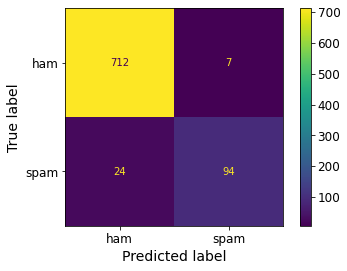

In [106]:
#confusion matrix for Decision Tree

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

f = open("SVM.txt", "w")

accuracy_score = metrics.accuracy_score(test_Y, pred_Y)

con_matrix = confusion_matrix(test_Y,pred_Y, labels=[0,1])

report_matrix = classification_report(test_Y, pred_Y,labels=[0,1])

L = [str(accuracy_score),"\n\n",str(con_matrix),'\n\n', str(report_matrix)] 
f.writelines(L) 
f.close()

from sklearn.metrics import ConfusionMatrixDisplay

fig = plt.figure()
Disp =ConfusionMatrixDisplay(con_matrix,display_labels=['ham','spam'])
Disp.plot()
plt.savefig("SVM_confusion_matrix")
plt.close(fig)

In [107]:
print(report_matrix)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       719
           1       0.93      0.80      0.86       118

    accuracy                           0.96       837
   macro avg       0.95      0.89      0.92       837
weighted avg       0.96      0.96      0.96       837



Hence, we can observe that we are getting highest accuracy as 96% in both SVM classifier and Random Forest.
Now, since, the precision is our main focus in spam classification and we are gettinng 0.94 precision in random forest and 0.93 precision in SVM classification; so we can choose random forest classifier as our best model.